In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_excel('Dashboard of online sales service(AutoRecovered).xlsx')

In [3]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
TotalPrice           2489
dtype: int64

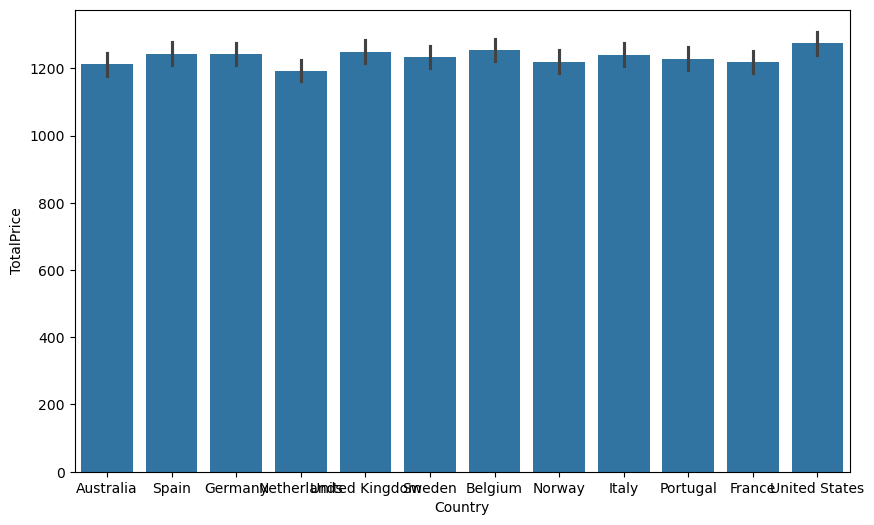

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='TotalPrice', data=df)
plt.show()

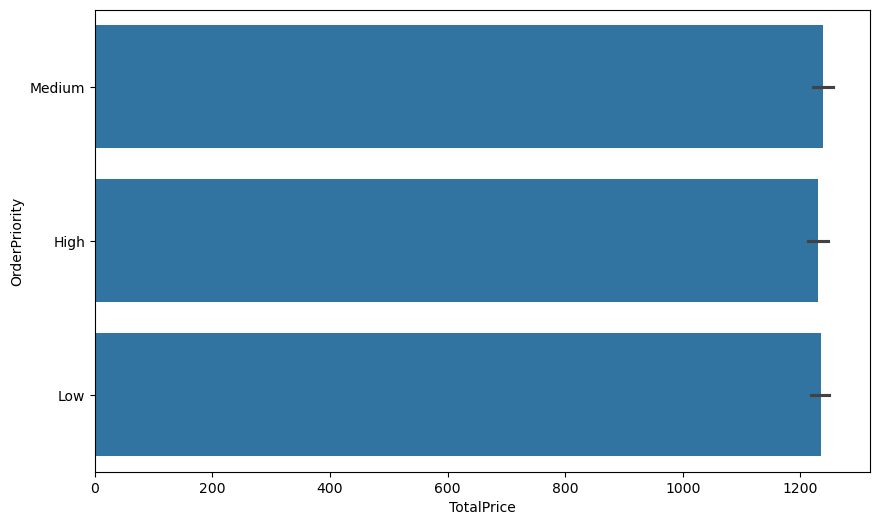

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(y='OrderPriority', x='TotalPrice', data=df)
plt.show()

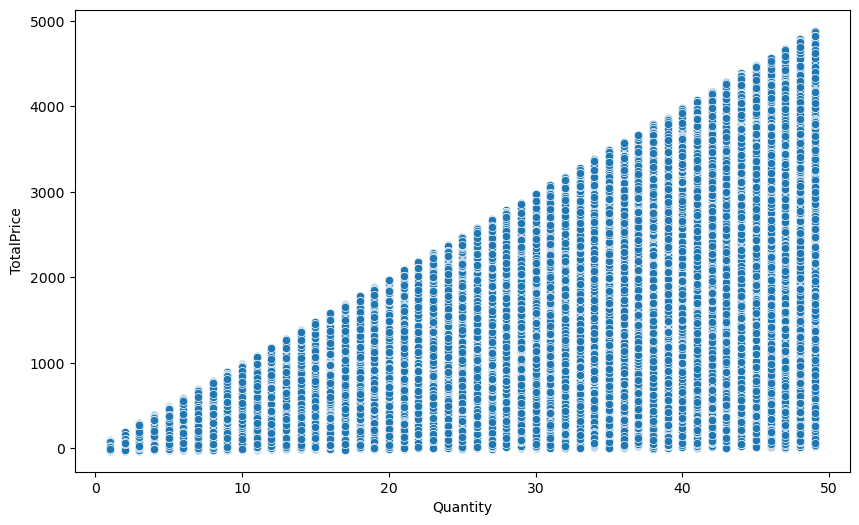

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df)
plt.show()

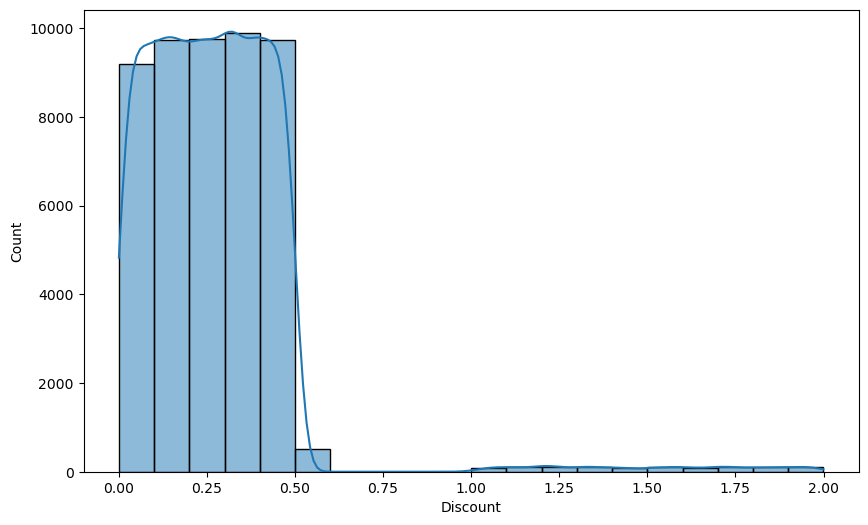

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['Discount'], bins=20, kde=True)
plt.show()

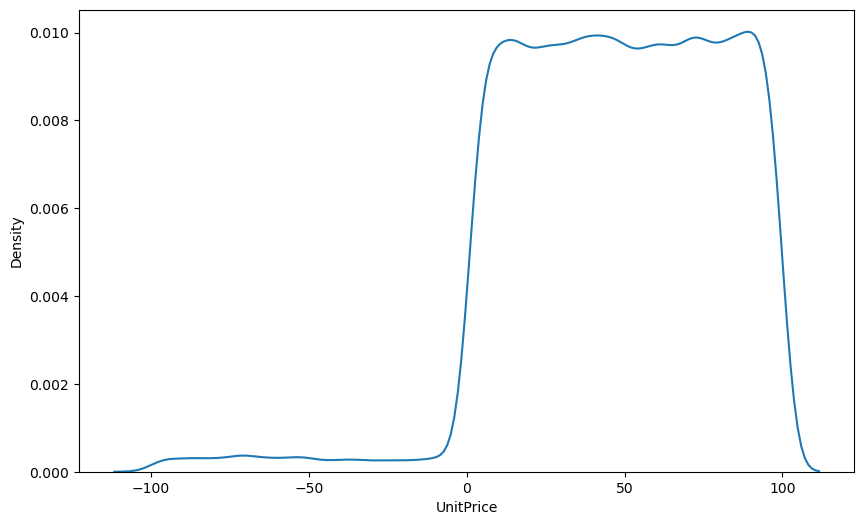

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['UnitPrice'])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          49782 non-null  int64         
 1   StockCode          49782 non-null  object        
 2   Description        49782 non-null  object        
 3   Quantity           49782 non-null  int64         
 4   InvoiceDate        49782 non-null  datetime64[ns]
 5   UnitPrice          49782 non-null  float64       
 6   CustomerID         44804 non-null  float64       
 7   Country            49782 non-null  object        
 8   Discount           49782 non-null  float64       
 9   PaymentMethod      49782 non-null  object        
 10  ShippingCost       47293 non-null  float64       
 11  Category           49782 non-null  object        
 12  SalesChannel       49782 non-null  object        
 13  ReturnStatus       49782 non-null  object        
 14  Shipme

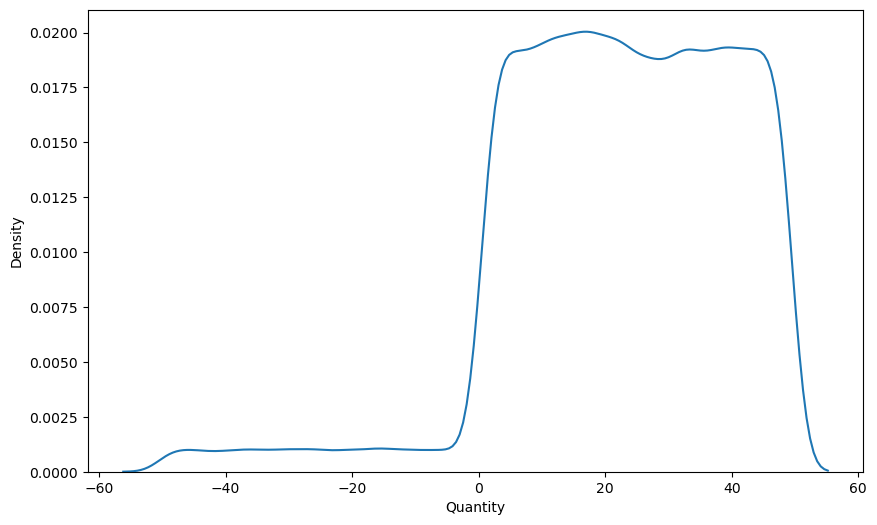

In [10]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Quantity'])
plt.show()

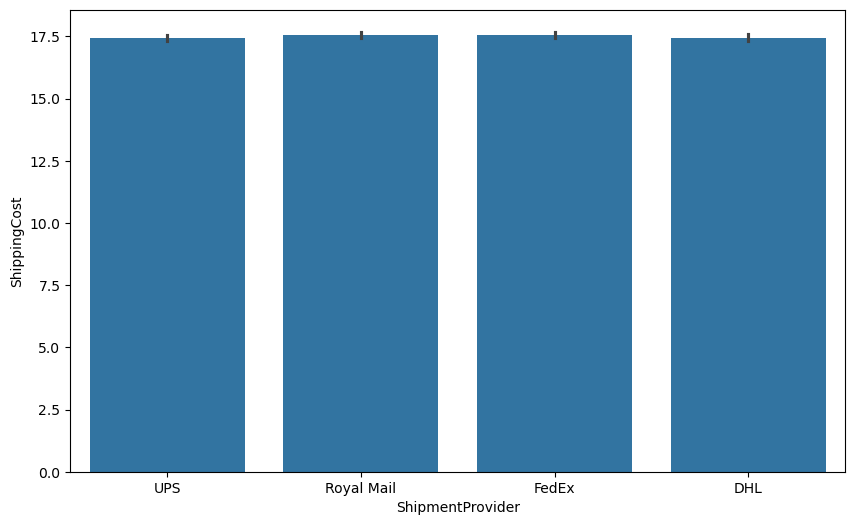

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='ShipmentProvider', y='ShippingCost', data=df)
plt.show()

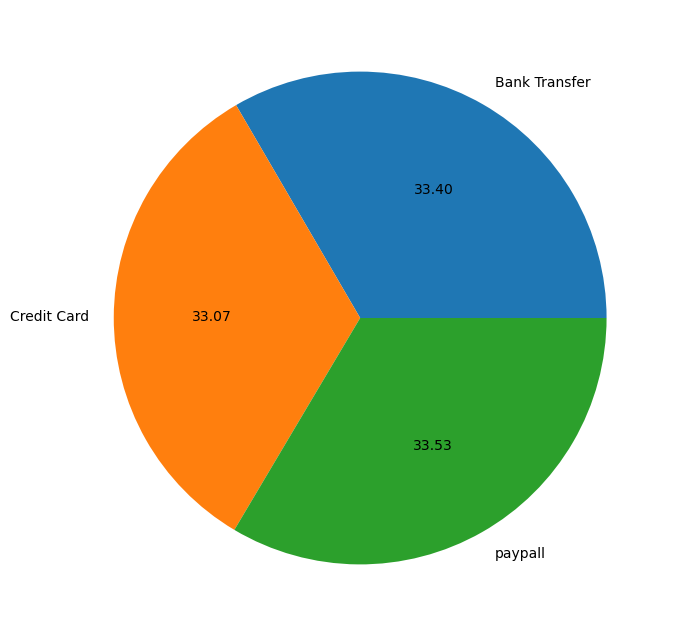

In [12]:
Payment_Discount = df.groupby('PaymentMethod')['Discount'].sum()
plt.figure(figsize=(8,8))
plt.pie(Payment_Discount,labels=Payment_Discount.index, autopct='%.2f')
plt.show()

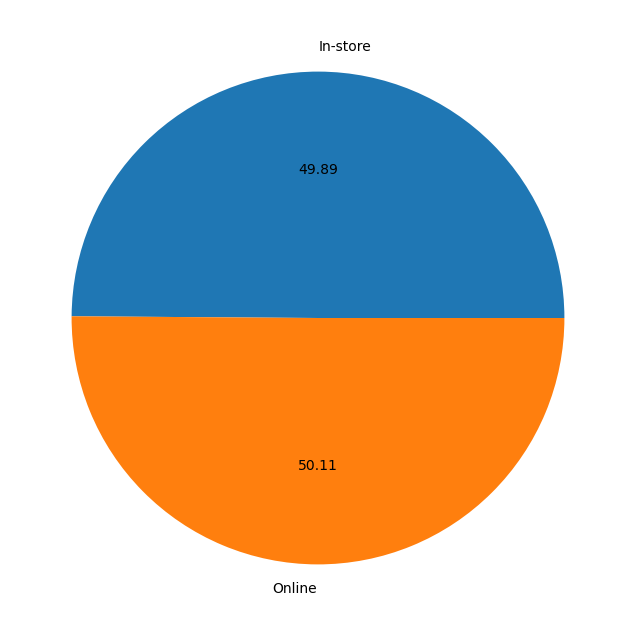

In [13]:
channel_receipt = df.groupby('SalesChannel')['TotalPrice'].sum()
plt.figure(figsize=(8,8))
plt.pie(channel_receipt,labels=channel_receipt.index, autopct='%.2f')
plt.show()

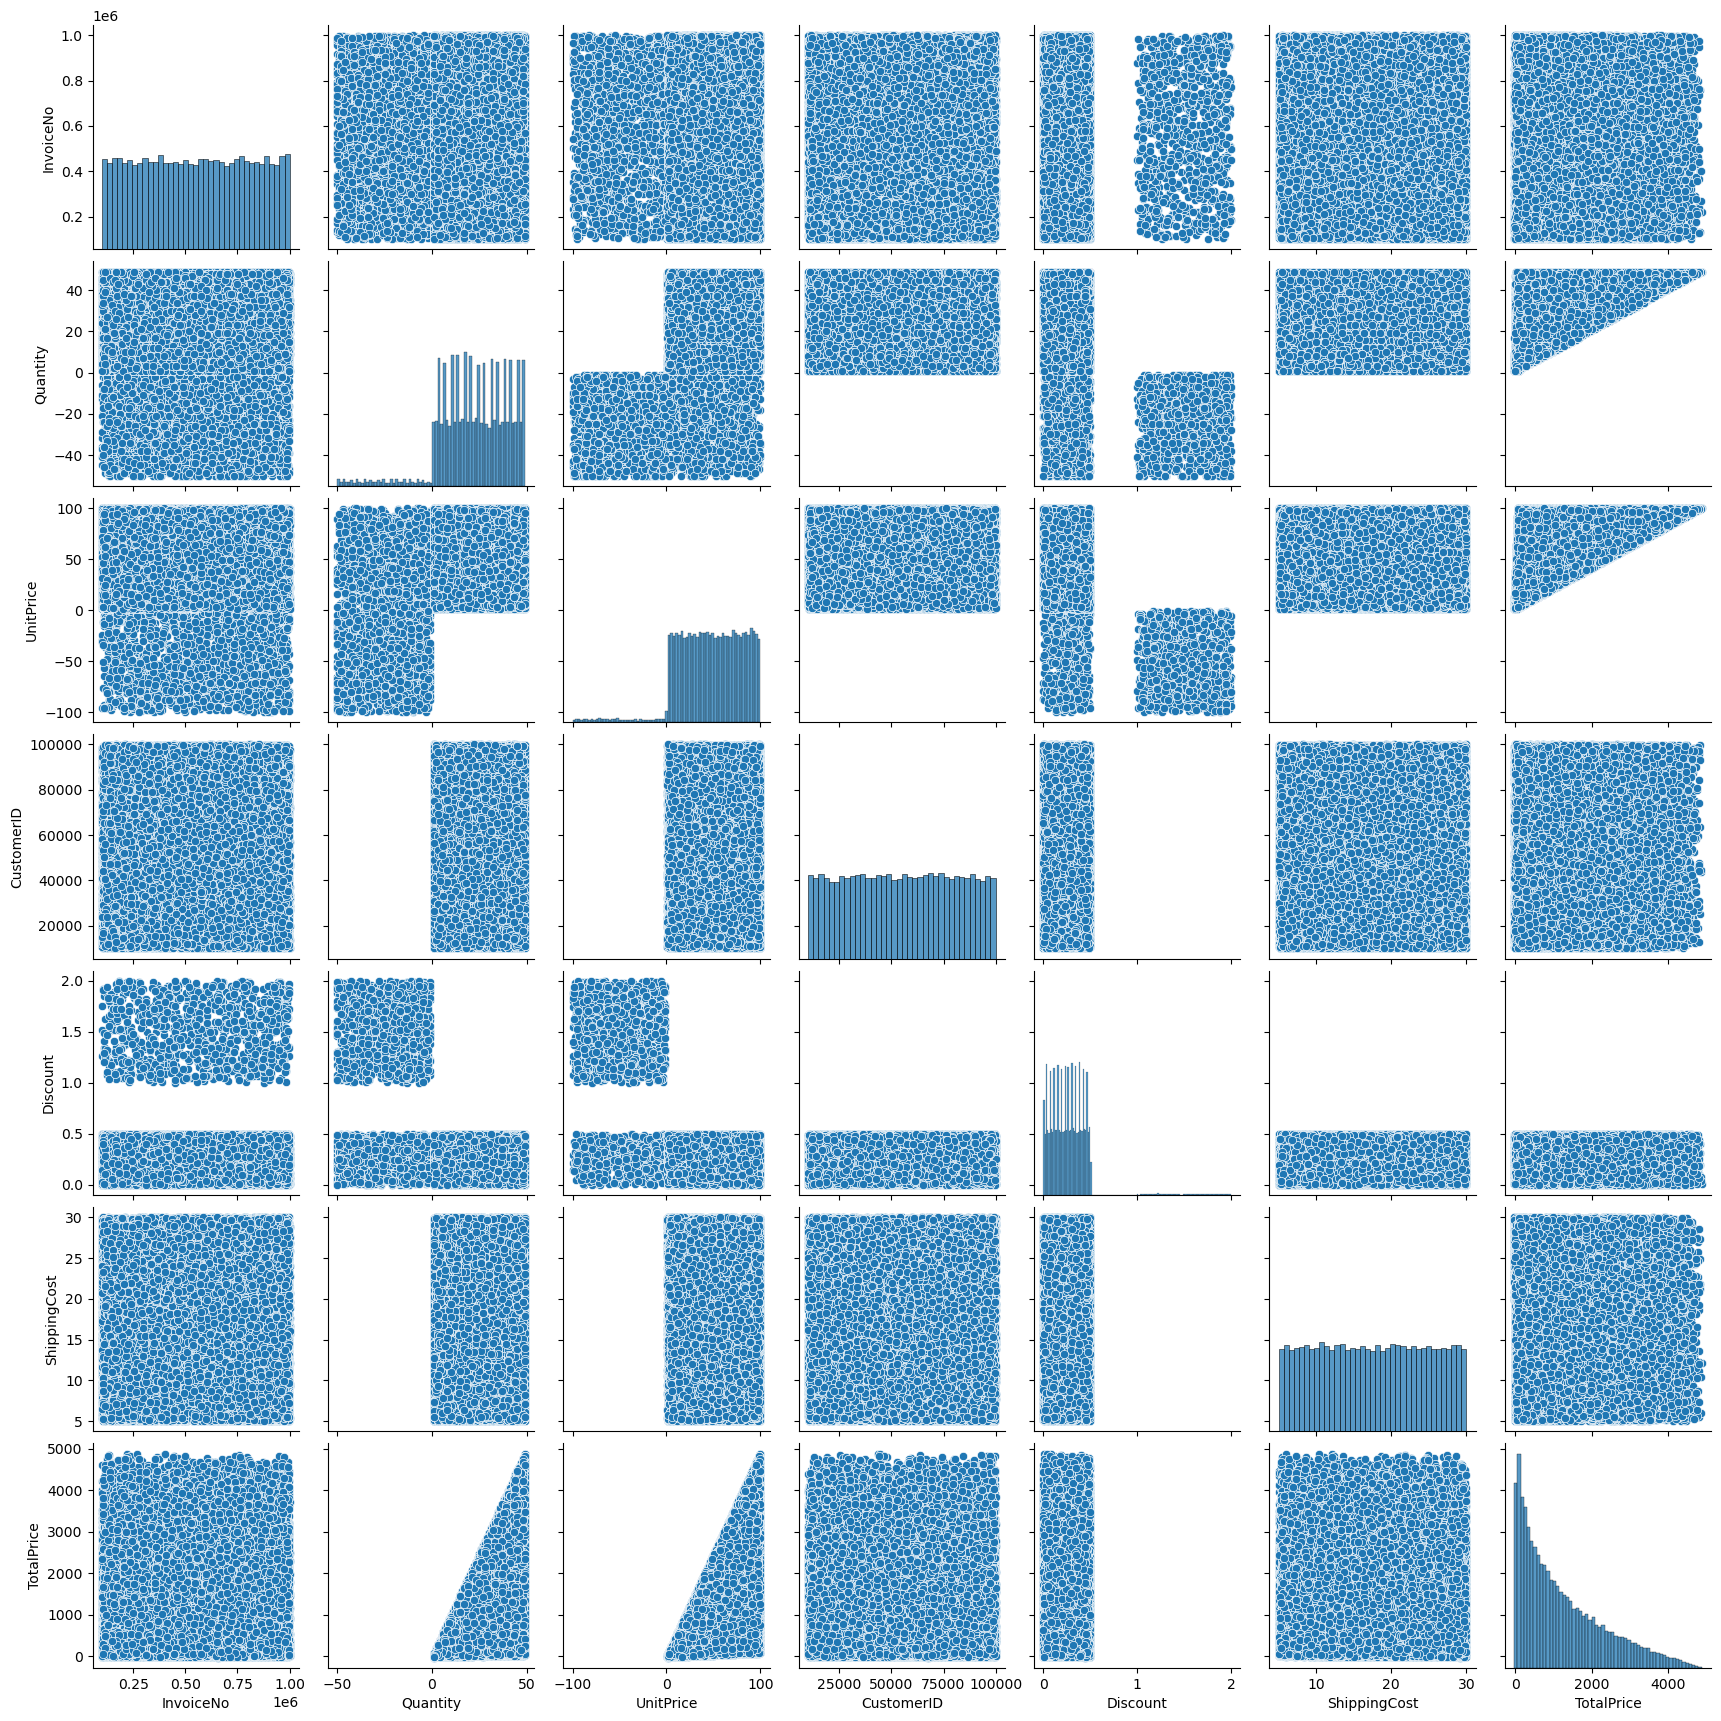

In [14]:
sns.pairplot(df)
plt.show()

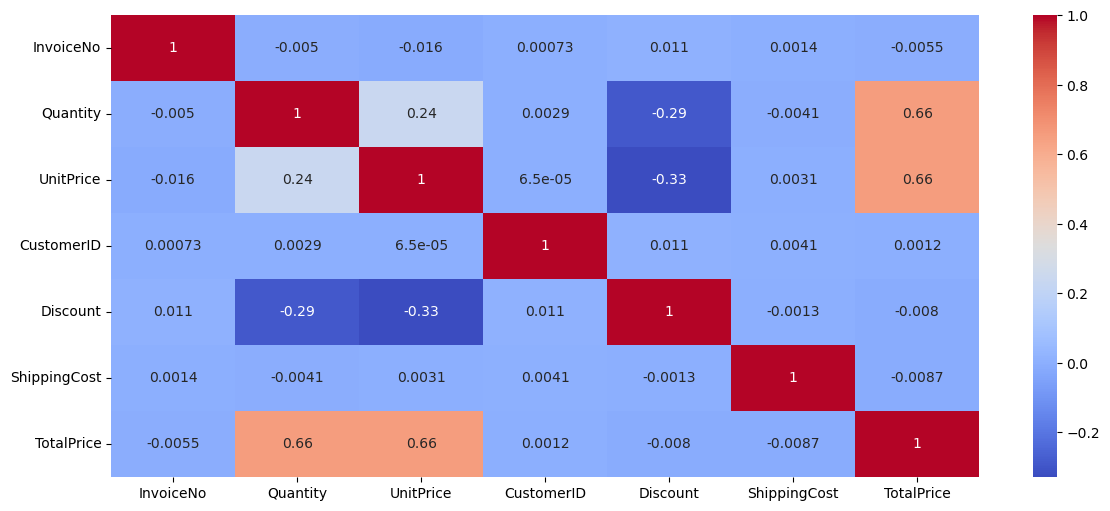

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)
plt.show()

In [16]:
df['Description'].nunique()

11

In [17]:
df['Category'].nunique()

5

In [142]:
df.nunique()

Quantity           99
UnitPrice       11200
Discount         1047
ShippingCost     2501
TotalPrice      45489
Credit Card         2
paypall             2
Online              2
Returned            2
FedEx               2
Royal Mail          2
UPS                 2
Low                 2
Medium              2
dtype: int64

In [18]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
TotalPrice           2489
dtype: int64

In [19]:
df['StockCode'].nunique()

1000

In [20]:
df['Country'].nunique()

12

In [21]:
df['ReturnStatus'].nunique()

2

In [22]:
df['OrderPriority'].nunique()

3

In [23]:
df = df[['Quantity','UnitPrice','Discount','PaymentMethod','ShippingCost','SalesChannel','ReturnStatus','ShipmentProvider','OrderPriority','TotalPrice']]

In [24]:
df

,Quantity,UnitPrice,Discount,PaymentMethod,ShippingCost,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice
0,38,1.71,0.470000,Bank Transfer,10.79,In-store,Not Returned,UPS,Medium,36.33
1,18,41.25,0.190000,paypall,9.51,Online,Not Returned,UPS,Medium,729.57
2,49,29.11,0.350000,Bank Transfer,23.03,Online,Returned,UPS,High,1386.21
3,14,76.68,0.140000,paypall,11.08,Online,Not Returned,Royal Mail,Low,1060.48
4,-30,-68.11,1.501433,Bank Transfer,NaN,In-store,Not Returned,FedEx,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,Credit Card,8.96,Online,Returned,UPS,Medium,1759.04
49778,7,51.74,0.230000,Bank Transfer,23.55,Online,Not Returned,FedEx,Low,337.02
49779,43,85.25,0.200000,Bank Transfer,16.26,In-store,Not Returned,FedEx,High,3640.89
49780,48,39.64,0.310000,paypall,28.56,Online,Not Returned,Royal Mail,Medium,1859.28


In [25]:
df.isnull().sum()

Quantity               0
UnitPrice              0
Discount               0
PaymentMethod          0
ShippingCost        2489
SalesChannel           0
ReturnStatus           0
ShipmentProvider       0
OrderPriority          0
TotalPrice          2489
dtype: int64

In [26]:
df['ShippingCost']=df['ShippingCost'].fillna(df['ShippingCost'].median())

In [27]:
df

,Quantity,UnitPrice,Discount,PaymentMethod,ShippingCost,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice
0,38,1.71,0.470000,Bank Transfer,10.79,In-store,Not Returned,UPS,Medium,36.33
1,18,41.25,0.190000,paypall,9.51,Online,Not Returned,UPS,Medium,729.57
2,49,29.11,0.350000,Bank Transfer,23.03,Online,Returned,UPS,High,1386.21
3,14,76.68,0.140000,paypall,11.08,Online,Not Returned,Royal Mail,Low,1060.48
4,-30,-68.11,1.501433,Bank Transfer,17.50,In-store,Not Returned,FedEx,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,Credit Card,8.96,Online,Returned,UPS,Medium,1759.04
49778,7,51.74,0.230000,Bank Transfer,23.55,Online,Not Returned,FedEx,Low,337.02
49779,43,85.25,0.200000,Bank Transfer,16.26,In-store,Not Returned,FedEx,High,3640.89
49780,48,39.64,0.310000,paypall,28.56,Online,Not Returned,Royal Mail,Medium,1859.28


In [28]:
df.isnull().sum()

Quantity               0
UnitPrice              0
Discount               0
PaymentMethod          0
ShippingCost           0
SalesChannel           0
ReturnStatus           0
ShipmentProvider       0
OrderPriority          0
TotalPrice          2489
dtype: int64

In [29]:
df['TotalPrice']=df['TotalPrice'].fillna(df['TotalPrice'].median())

In [30]:
df

,Quantity,UnitPrice,Discount,PaymentMethod,ShippingCost,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice
0,38,1.71,0.470000,Bank Transfer,10.79,In-store,Not Returned,UPS,Medium,36.33
1,18,41.25,0.190000,paypall,9.51,Online,Not Returned,UPS,Medium,729.57
2,49,29.11,0.350000,Bank Transfer,23.03,Online,Returned,UPS,High,1386.21
3,14,76.68,0.140000,paypall,11.08,Online,Not Returned,Royal Mail,Low,1060.48
4,-30,-68.11,1.501433,Bank Transfer,17.50,In-store,Not Returned,FedEx,Medium,923.90
...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,Credit Card,8.96,Online,Returned,UPS,Medium,1759.04
49778,7,51.74,0.230000,Bank Transfer,23.55,Online,Not Returned,FedEx,Low,337.02
49779,43,85.25,0.200000,Bank Transfer,16.26,In-store,Not Returned,FedEx,High,3640.89
49780,48,39.64,0.310000,paypall,28.56,Online,Not Returned,Royal Mail,Medium,1859.28


In [31]:
df.isnull().sum()

Quantity            0
UnitPrice           0
Discount            0
PaymentMethod       0
ShippingCost        0
SalesChannel        0
ReturnStatus        0
ShipmentProvider    0
OrderPriority       0
TotalPrice          0
dtype: int64

In [32]:
df[['Credit Card','paypall']]=pd.get_dummies(df['PaymentMethod'],dtype=int,drop_first=True)

In [33]:
df = df.drop('PaymentMethod',axis=1)

In [34]:
df

,Quantity,UnitPrice,Discount,ShippingCost,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice,Credit Card,paypall
0,38,1.71,0.470000,10.79,In-store,Not Returned,UPS,Medium,36.33,0,0
1,18,41.25,0.190000,9.51,Online,Not Returned,UPS,Medium,729.57,0,1
2,49,29.11,0.350000,23.03,Online,Returned,UPS,High,1386.21,0,0
3,14,76.68,0.140000,11.08,Online,Not Returned,Royal Mail,Low,1060.48,0,1
4,-30,-68.11,1.501433,17.50,In-store,Not Returned,FedEx,Medium,923.90,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,8.96,Online,Returned,UPS,Medium,1759.04,1,0
49778,7,51.74,0.230000,23.55,Online,Not Returned,FedEx,Low,337.02,0,0
49779,43,85.25,0.200000,16.26,In-store,Not Returned,FedEx,High,3640.89,0,0
49780,48,39.64,0.310000,28.56,Online,Not Returned,Royal Mail,Medium,1859.28,0,1


In [35]:
df['Online']=pd.get_dummies(df['SalesChannel'],dtype=int,drop_first=True)

In [36]:
df = df.drop('SalesChannel',axis=1)

In [37]:
df

,Quantity,UnitPrice,Discount,ShippingCost,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice,Credit Card,paypall,Online
0,38,1.71,0.470000,10.79,Not Returned,UPS,Medium,36.33,0,0,0
1,18,41.25,0.190000,9.51,Not Returned,UPS,Medium,729.57,0,1,1
2,49,29.11,0.350000,23.03,Returned,UPS,High,1386.21,0,0,1
3,14,76.68,0.140000,11.08,Not Returned,Royal Mail,Low,1060.48,0,1,1
4,-30,-68.11,1.501433,17.50,Not Returned,FedEx,Medium,923.90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,8.96,Returned,UPS,Medium,1759.04,1,0,1
49778,7,51.74,0.230000,23.55,Not Returned,FedEx,Low,337.02,0,0,1
49779,43,85.25,0.200000,16.26,Not Returned,FedEx,High,3640.89,0,0,0
49780,48,39.64,0.310000,28.56,Not Returned,Royal Mail,Medium,1859.28,0,1,1


In [38]:
df['Returned']=pd.get_dummies(df['ReturnStatus'],dtype=int,drop_first=True)

In [39]:
df = df.drop('ReturnStatus',axis=1)

In [40]:
df

,Quantity,UnitPrice,Discount,ShippingCost,ShipmentProvider,OrderPriority,TotalPrice,Credit Card,paypall,Online,Returned
0,38,1.71,0.470000,10.79,UPS,Medium,36.33,0,0,0,0
1,18,41.25,0.190000,9.51,UPS,Medium,729.57,0,1,1,0
2,49,29.11,0.350000,23.03,UPS,High,1386.21,0,0,1,1
3,14,76.68,0.140000,11.08,Royal Mail,Low,1060.48,0,1,1,0
4,-30,-68.11,1.501433,17.50,FedEx,Medium,923.90,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,8.96,UPS,Medium,1759.04,1,0,1,1
49778,7,51.74,0.230000,23.55,FedEx,Low,337.02,0,0,1,0
49779,43,85.25,0.200000,16.26,FedEx,High,3640.89,0,0,0,0
49780,48,39.64,0.310000,28.56,Royal Mail,Medium,1859.28,0,1,1,0


In [41]:
df[['FedEx','Royal Mail','UPS']]=pd.get_dummies(df['ShipmentProvider'],dtype=int,drop_first=True)

In [42]:
df = df.drop('ShipmentProvider',axis=1)

In [43]:
df

,Quantity,UnitPrice,Discount,ShippingCost,OrderPriority,TotalPrice,Credit Card,paypall,Online,Returned,FedEx,Royal Mail,UPS
0,38,1.71,0.470000,10.79,Medium,36.33,0,0,0,0,0,0,1
1,18,41.25,0.190000,9.51,Medium,729.57,0,1,1,0,0,0,1
2,49,29.11,0.350000,23.03,High,1386.21,0,0,1,1,0,0,1
3,14,76.68,0.140000,11.08,Low,1060.48,0,1,1,0,0,1,0
4,-30,-68.11,1.501433,17.50,Medium,923.90,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,8.96,Medium,1759.04,1,0,1,1,0,0,1
49778,7,51.74,0.230000,23.55,Low,337.02,0,0,1,0,1,0,0
49779,43,85.25,0.200000,16.26,High,3640.89,0,0,0,0,1,0,0
49780,48,39.64,0.310000,28.56,Medium,1859.28,0,1,1,0,0,1,0


In [44]:
df[['Low','Medium']]=pd.get_dummies(df['OrderPriority'],dtype=int,drop_first=True)

In [45]:
df = df.drop('OrderPriority',axis=1)

In [46]:
df

,Quantity,UnitPrice,Discount,ShippingCost,TotalPrice,Credit Card,paypall,Online,Returned,FedEx,Royal Mail,UPS,Low,Medium
0,38,1.71,0.470000,10.79,36.33,0,0,0,0,0,0,1,0,1
1,18,41.25,0.190000,9.51,729.57,0,1,1,0,0,0,1,0,1
2,49,29.11,0.350000,23.03,1386.21,0,0,1,1,0,0,1,0,0
3,14,76.68,0.140000,11.08,1060.48,0,1,1,0,0,1,0,1,0
4,-30,-68.11,1.501433,17.50,923.90,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,8.96,1759.04,1,0,1,1,0,0,1,0,1
49778,7,51.74,0.230000,23.55,337.02,0,0,1,0,1,0,0,1,0
49779,43,85.25,0.200000,16.26,3640.89,0,0,0,0,1,0,0,0,0
49780,48,39.64,0.310000,28.56,1859.28,0,1,1,0,0,1,0,0,1


In [47]:
df.columns

Index(['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalPrice',
       'Credit Card', 'paypall', 'Online', 'Returned', 'FedEx', 'Royal Mail',
       'UPS', 'Low', 'Medium'],
      dtype='object')

In [48]:
X = df.drop('TotalPrice',axis=1)

In [49]:
y = df['TotalPrice']

In [50]:
y

0          36.33
1         729.57
2        1386.21
3        1060.48
4         923.90
          ...   
49777    1759.04
49778     337.02
49779    3640.89
49780    1859.28
49781    1135.97
Name: TotalPrice, Length: 49782, dtype: float64

In [51]:
X

,Quantity,UnitPrice,Discount,ShippingCost,Credit Card,paypall,Online,Returned,FedEx,Royal Mail,UPS,Low,Medium
0,38,1.71,0.470000,10.79,0,0,0,0,0,0,1,0,1
1,18,41.25,0.190000,9.51,0,1,1,0,0,0,1,0,1
2,49,29.11,0.350000,23.03,0,0,1,1,0,0,1,0,0
3,14,76.68,0.140000,11.08,0,1,1,0,0,1,0,1,0
4,-30,-68.11,1.501433,17.50,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,25,70.92,0.200000,8.96,1,0,1,1,0,0,1,0,1
49778,7,51.74,0.230000,23.55,0,0,1,0,1,0,0,1,0
49779,43,85.25,0.200000,16.26,0,0,0,0,1,0,0,0,0
49780,48,39.64,0.310000,28.56,0,1,1,0,0,1,0,0,1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test)

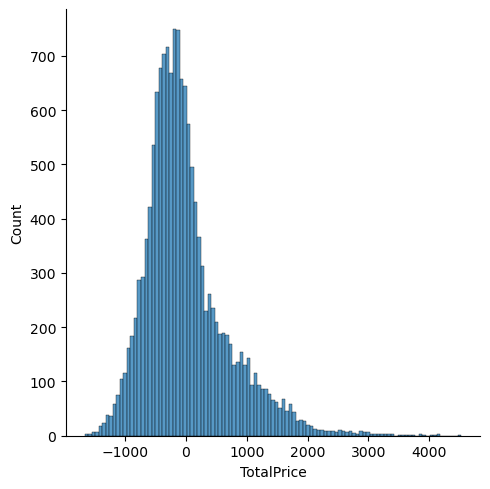

In [56]:
sns.displot(y_test-y_pred)
plt.show()

In [57]:
knn = KNeighborsRegressor()

In [58]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [59]:
knn_pred = knn.predict(X_test)

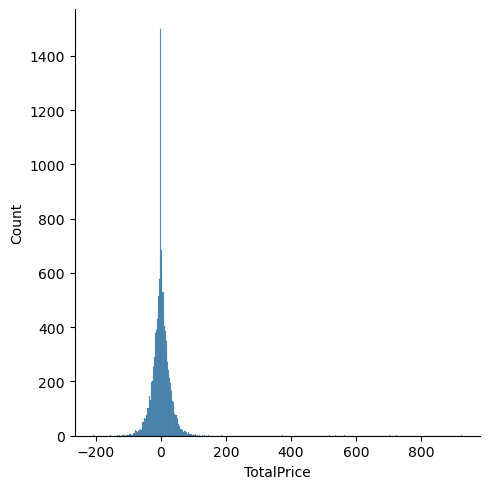

In [60]:
sns.displot(y_test-knn_pred)
plt.show()

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dt_r = DecisionTreeRegressor()

In [63]:
dt_r.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
dt_pred = dt_r.predict(X_test)

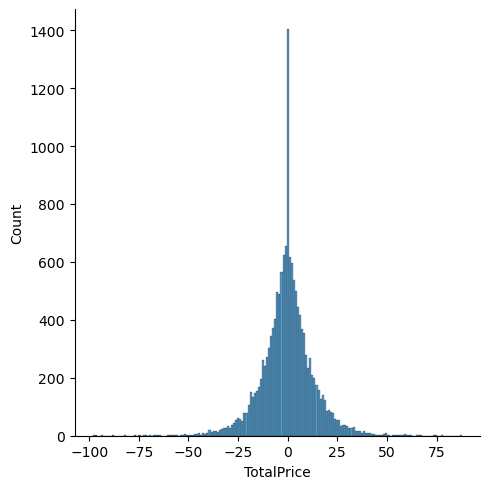

In [65]:
sns.displot(y_test-dt_pred)
plt.show()

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf = RandomForestRegressor()

In [68]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
rf_pred = rf.predict(X_test)

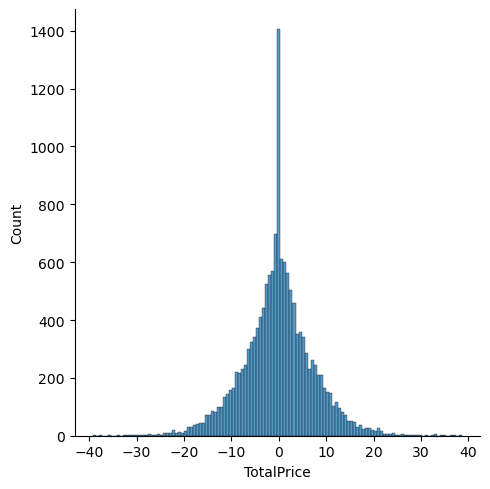

In [70]:
sns.displot(y_test-rf_pred)
plt.show()